![Screenshot of the terminalwhere repo was cloned](./../../Screenshot-repo-clone.png)
![Screenshot after executing rye sync](./../../Screenshot-rye-sync.png)

In [39]:
import torch
import matplotlib.pyplot as plt

In [40]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device

0
1
NVIDIA GeForce RTX 3050 Laptop GPU


device(type='cuda', index=0)

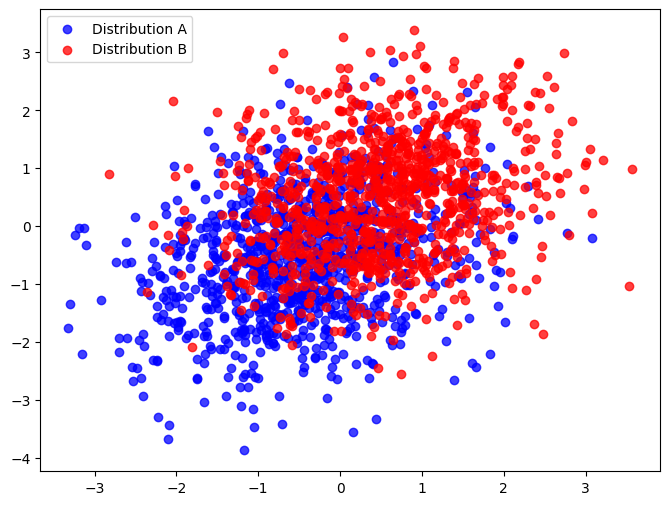

In [41]:
#Generating the dataset, part 2 of Assignment 1A

# Parameters for the bivariate normal distribution
mean_A = torch.tensor([-0.5, -0.5])
covariance_A = torch.tensor([[1.0, 0.25], [0.25, 1.0]])

mean_B = torch.tensor([0.5, 0.5])
covariance_B = torch.tensor([[1.0, 0.25], [0.25, 1.0]])

# Create the Multivariate Normal distribution
multivariate_distribution_A = torch.distributions.MultivariateNormal(mean_A, covariance_A)
multivariate_distribution_B = torch.distributions.MultivariateNormal(mean_B, covariance_B)

# Generate 1000 samples each
A = multivariate_distribution_A.sample((1000,))
B = multivariate_distribution_B.sample((1000,))

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(A[:, 0], A[:, 1], color='blue', alpha=0.75, label='Distribution A')
plt.scatter(B[:, 0], B[:, 1], color='red', alpha=0.75, label='Distribution B')
plt.legend()
plt.show()

x = torch.cat((A, B), dim=0)

Min and max data: tensor([-3.3206, -3.8679]) tensor([3.5688, 3.3811])


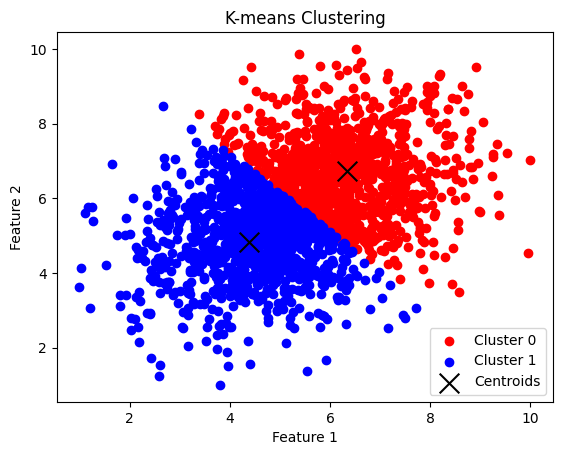

Number of data points in each cluster are: tensor([ 993, 1007])
Final centroids:
 tensor([[6.3475, 6.7391],
        [4.3923, 4.8245]])


In [42]:
# K Means Algorithm Implementation, 3rd part of Assignment 1A


#Scaling the data from 1 to 10, instead of -x to +x
def scale_data(data, min_value = 1, max_value = 10):
  data_min = torch.min(data, dim = 0).values
  data_max = torch.max(data, dim = 0).values
  print("Min and max data:", data_min, data_max)
  scaled_dataset = min_value + (data - data_min) * (max_value - min_value) / (data_max - data_min)
  return scaled_dataset

#Function to get random centroids, to initialise it
def random_centroids(data, k):
  Xmin = torch.min(data, dim=0).values
  Xmax = torch.max(data, dim=0).values
  centroids = Xmin + torch.rand(k, data.shape[1]) * (Xmax - Xmin)
  return centroids

#Function to get the new labels
def get_labels(data, centroids):
  distances = torch.cdist(data, centroids, p = 2)
  labels = torch.argmin(distances, dim=1)
  return labels

#Function to update the centroids
def get_new_centroids(data, labels, k, centroids):
  new_centroids = torch.zeros_like(centroids)
  for i in range(k):
    cluster_data = data[labels == i]
    if cluster_data.shape[0] > 0:
      new_centroids[i] = torch.mean(cluster_data, dim=0)
  return new_centroids

# Function for K-means clustering
def k_means_clustering(data, k, num_iterations=100):
  centroids = random_centroids(data, k)
  for i in range(num_iterations):
     labels = get_labels(data, centroids)
     new_centroids = get_new_centroids(data, labels, k, centroids)
     if torch.allclose(centroids, new_centroids, atol=1e-4):
      break
     centroids = new_centroids
  return centroids, labels

#Function to plot the clusters and label it
def plot_clusters(data, labels, centroids, k):
  colors = ['r', 'b', 'g']

  for i in range(k):
    cluster_data = data[labels == i]
    plt.scatter(cluster_data[:, 0].numpy(), cluster_data[:, 1].numpy(), c=colors[i], label=f'Cluster {i}')

  plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, label='Centroids')
  plt.title('K-means Clustering')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.show()


scaled_x = scale_data(x,1,10)

# K Means Clustering with 2 clusters
centroids, labels = k_means_clustering(scaled_x, k = 2)
plot_clusters(scaled_x, labels, centroids, k = 2)
print("Number of data points in each cluster are:", torch.bincount(labels))
print("Final centroids:\n", centroids)



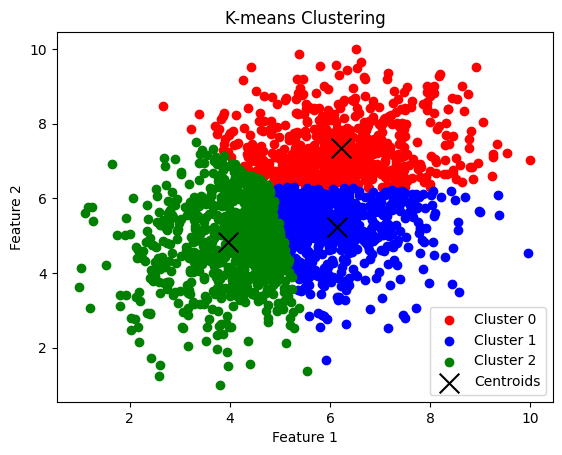

Number of data points in each cluster are: tensor([657, 602, 741])
Final centroids:
 tensor([[6.2258, 7.3418],
        [6.1403, 5.2276],
        [3.9667, 4.8308]])


In [43]:
# K Means clustering with 3 clusters

centroids, labels = k_means_clustering(scaled_x, k = 3)
plot_clusters(scaled_x, labels, centroids, k = 3)
print("Number of data points in each cluster are:", torch.bincount(labels))
print("Final centroids:\n", centroids)

In [44]:
# PCA Implementation, part 4 of Assignment 1A

# Generating the synethetic data in the video with only pytorch
X = torch.randn(100, 2)
col_3 = 3 * X[:, 0] - 2 * X[:, 1] + torch.randn(100) * 0.1
col_4 = 1.5 * X[:, 0] - 0.5 * X[:, 1] + torch.randn(100) * 0.1
X = torch.cat((X, col_3.unsqueeze(1), col_4.unsqueeze(1)), dim=1)

# PCA
X = X - torch.mean(X, dim=0)
cov_matrix = torch.mm(X.T, X) / (X.shape[0] - 1)
eigenvalues, eigenvectors = torch.linalg.eig(cov_matrix)
eigenvalue_magnitudes = eigenvalues.real
sorted_indices = torch.argsort(eigenvalue_magnitudes, descending=True)
eigenvectors_sorted = eigenvectors[:, sorted_indices]
eigenvectors_sorted = eigenvectors_sorted.real
print(eigenvectors_sorted)

tensor([[ 0.2078,  0.4829,  0.2184,  0.8222],
        [-0.1319,  0.7975,  0.2901, -0.5122],
        [ 0.8914, -0.1373,  0.3590, -0.2400],
        [ 0.3804,  0.3345, -0.8598, -0.0643]])
